# Machine Learning Pipeline - Model Training

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [17]:
!pip install optuna

In [18]:
!pip install lightgbm

In [20]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [21]:
target = 'charges'

In [22]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

y_train = pd.read_csv('ytrain.csv')

X_train.head()

,age,sex,bmi,children,smoker,region
0,0.444444,1.0,0.288594,0.6,1.0,0.666667
1,0.622222,0.0,0.438563,0.2,0.0,0.666667
2,0.444444,1.0,0.691180,0.0,1.0,1.000000
3,0.511111,0.0,0.661274,0.0,0.0,0.333333
4,0.977778,0.0,0.411612,0.0,1.0,0.666667


In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [27]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid)

lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
}

evals_result = {}
gbm = lgb.train(
    params=lgbm_params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=10
)


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and w

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 6
[LightGBM] [Info] Start training from score -0.199903
[LightGBM] [Info] Start training from score -2.292950
[LightGBM] [Info] Start training from score -2.522966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [34]:
test_pred = ((gbm.predict(X_test))).argmax(axis=1)
test_pred

array([0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 1, 0, 0])

In [35]:
joblib.dump(gbm, 'lightgbm.joblib') 

['lightgbm.joblib']

In [10]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,charges
0,1
1,0
2,2
3,0
4,2


In [11]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [12]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [13]:
# set up the model
# remember to set the random_state / seed


#lin_model = Lasso(alpha=0.001, random_state=0)
model = LinearSVC()

# train the model

model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC()

In [15]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 0
train rmse: 0
train r2: 0.7400867438628324

test mse: 0
test rmse: 0
test r2: 0.781566306553192

Average house price:  1


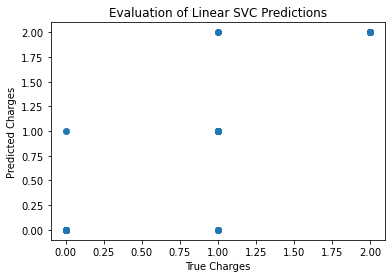

In [16]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True Charges')
plt.ylabel('Predicted Charges')
plt.title('Evaluation of Linear SVC Predictions')
plt.show()

We can see that our model is doing a pretty good job at estimating house prices.

In [17]:
y_test.reset_index(drop=True)

,charges
0,0
1,0
2,0
3,1
4,0
...,...
115,0
116,0
117,0
118,0


In [18]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(model.predict(X_test))

preds

0      0
1      0
2      0
3      1
4      0
      ..
115    0
116    0
117    1
118    0
119    0
Length: 120, dtype: int64

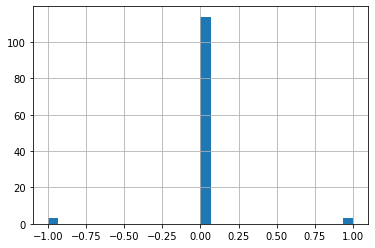

In [19]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test[target] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

In [21]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('LinearSVC Coefficients')
plt.title('Feature Importance')

ValueError: Length mismatch: Expected axis has 18 elements, new values have 6 elements

## Save the Model

In [22]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(model, 'linearsvc_classifier.joblib') 

['linearsvc_classifier.joblib']

# Additional Resources


## Feature Engineering

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Feature Engineering for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-engineering-for-machine-learning-a-comprehensive-overview-a7ad04c896f8) - Article
- [Practical Code Implementations of Feature Engineering for Machine Learning with Python](https://towardsdatascience.com/practical-code-implementations-of-feature-engineering-for-machine-learning-with-python-f13b953d4bcd) - Article

## Feature Selection

- [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/?referralCode=186501DF5D93F48C4F71) - Online Course
- [Feature Selection for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-selection-for-machine-learning-a-comprehensive-overview-bd571db5dd2d) - Article

## Machine Learning

- [Best Resources to Learn Machine Learning](https://trainindata.medium.com/find-out-the-best-resources-to-learn-machine-learning-cd560beec2b7) - Article
- [Machine Learning with Imbalanced Data](https://www.udemy.com/course/machine-learning-with-imbalanced-data/?referralCode=F30537642DA57D19ED83) - Online Course